In [0]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler #standardize dataset
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('ggplot')


Using TensorFlow backend.


In [0]:
#Get Stock
df = web.DataReader('MSFT', data_source='yahoo', start= '2010-01-01', end='2020-01-01')

#Show Data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,31.100000,30.590000,30.620001,30.950001,38409100.0,24.294369
2010-01-05,31.100000,30.639999,30.850000,30.959999,49749600.0,24.302216
2010-01-06,31.080000,30.520000,30.879999,30.770000,58182400.0,24.153070
2010-01-07,30.700001,30.190001,30.629999,30.450001,50559700.0,23.901886
2010-01-08,30.879999,30.240000,30.280001,30.660000,51197400.0,24.066734
...,...,...,...,...,...,...
2019-12-24,157.710007,157.119995,157.479996,157.380005,8989200.0,156.951309
2019-12-26,158.729996,157.399994,157.559998,158.669998,14520600.0,158.237793
2019-12-27,159.550003,158.220001,159.449997,158.960007,18412800.0,158.527008


Text(0, 0.5, 'Close Price')

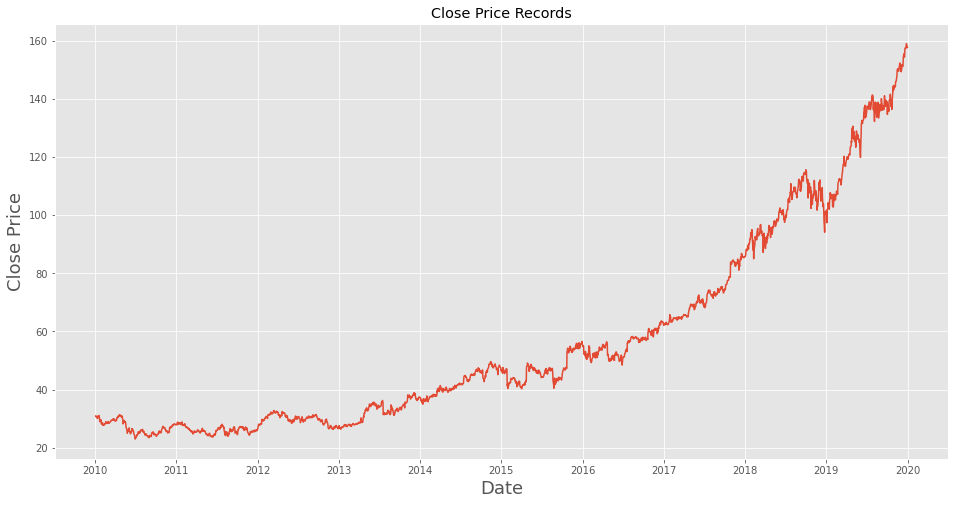

In [0]:
#Displaying all records of microsoft stock from 2010 to 2020
plt.figure(figsize=(16,8))
plt.title('Close Price Records')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)

In [0]:
#Declaring values to train algorithm
data = df.filter(['Close'])
dataset = data.values
training_data_len = len(dataset)


In [0]:
#Scaled dataset
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.05840383],
       [0.05847737],
       [0.05707981],
       ...,
       [1.        ],
       [0.98992269],
       [0.99073182]])

In [0]:
#Creating training dataset in x and y components
train_data = scaled_data[0:training_data_len , :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.05840383, 0.05847737, 0.05707981, 0.054726  , 0.05627068,
       0.05340199, 0.05193085, 0.05399044, 0.05847737, 0.05774182,
       0.05950717, 0.05575579, 0.05148952, 0.04376608, 0.04641412,
       0.04773814, 0.0489886 , 0.04523721, 0.03802869, 0.03972048,
       0.04008826, 0.04133872, 0.03552777, 0.03685178, 0.03464508,
       0.03677823, 0.03663111, 0.03758735, 0.03618977, 0.03927915,
       0.0410445 , 0.04383964, 0.04236852, 0.04207428, 0.03913203,
       0.04133872, 0.04111806, 0.04163295, 0.04420743, 0.04008826,
       0.04008826, 0.04133872, 0.0410445 , 0.04133872, 0.04258918,
       0.04383964, 0.04538433, 0.04604634, 0.04619346, 0.04678191,
       0.04869436, 0.04854726, 0.04840014, 0.0484737 , 0.05053327,
       0.04884148, 0.05148952, 0.04891504, 0.04840014, 0.04972416])]
[0.04619345632277763]



In [0]:
#Create numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2456, 60, 1)

In [0]:
#LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error') #adam improvement on existing optimizers
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
2456/2456 [==============================] - 73s 30ms/step - loss: 0.0014


In [0]:
#Test dataset of test values (1500-2500)
test_data = scaled_data[training_data_len - 60: , :]

#Create data sets x_test, y_test
x_test =[]
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

#reshape test values to suit LSTM model
x_test = np.array(x_test)
#x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [0]:
#Get predicted price values for models with RMSE of predictions
#predictions = model.predict(x_test)
#predictions = scaler.inverse_transform(predictions) #reverse scaling


In [0]:
#rmse=np.sqrt(np.mean(((predictions- y_test)**2)))